<>:72: SyntaxWarning: invalid escape sequence '\ '
<>:72: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-1642283167.py:72: SyntaxWarning: invalid escape sequence '\ '
  ax.set_title(f'${panel_labels[i]}\ T = {temp}$', loc='left')


ライブラリのインポートが完了しました。

論文掲載用のプロットスタイルが適用されました。
 - ファイル '3d_cl_T0.001_Pout_raw.csv' の読み込みに成功。
 - ファイル '3d_cl_T0.1_Pout_raw.csv' の読み込みに成功。
 - ファイル '3d_cl_T1.0_Pout_raw.csv' の読み込みに成功。

最終プロットを 'Fig2_Bistability_Histograms.pdf' として保存しました。


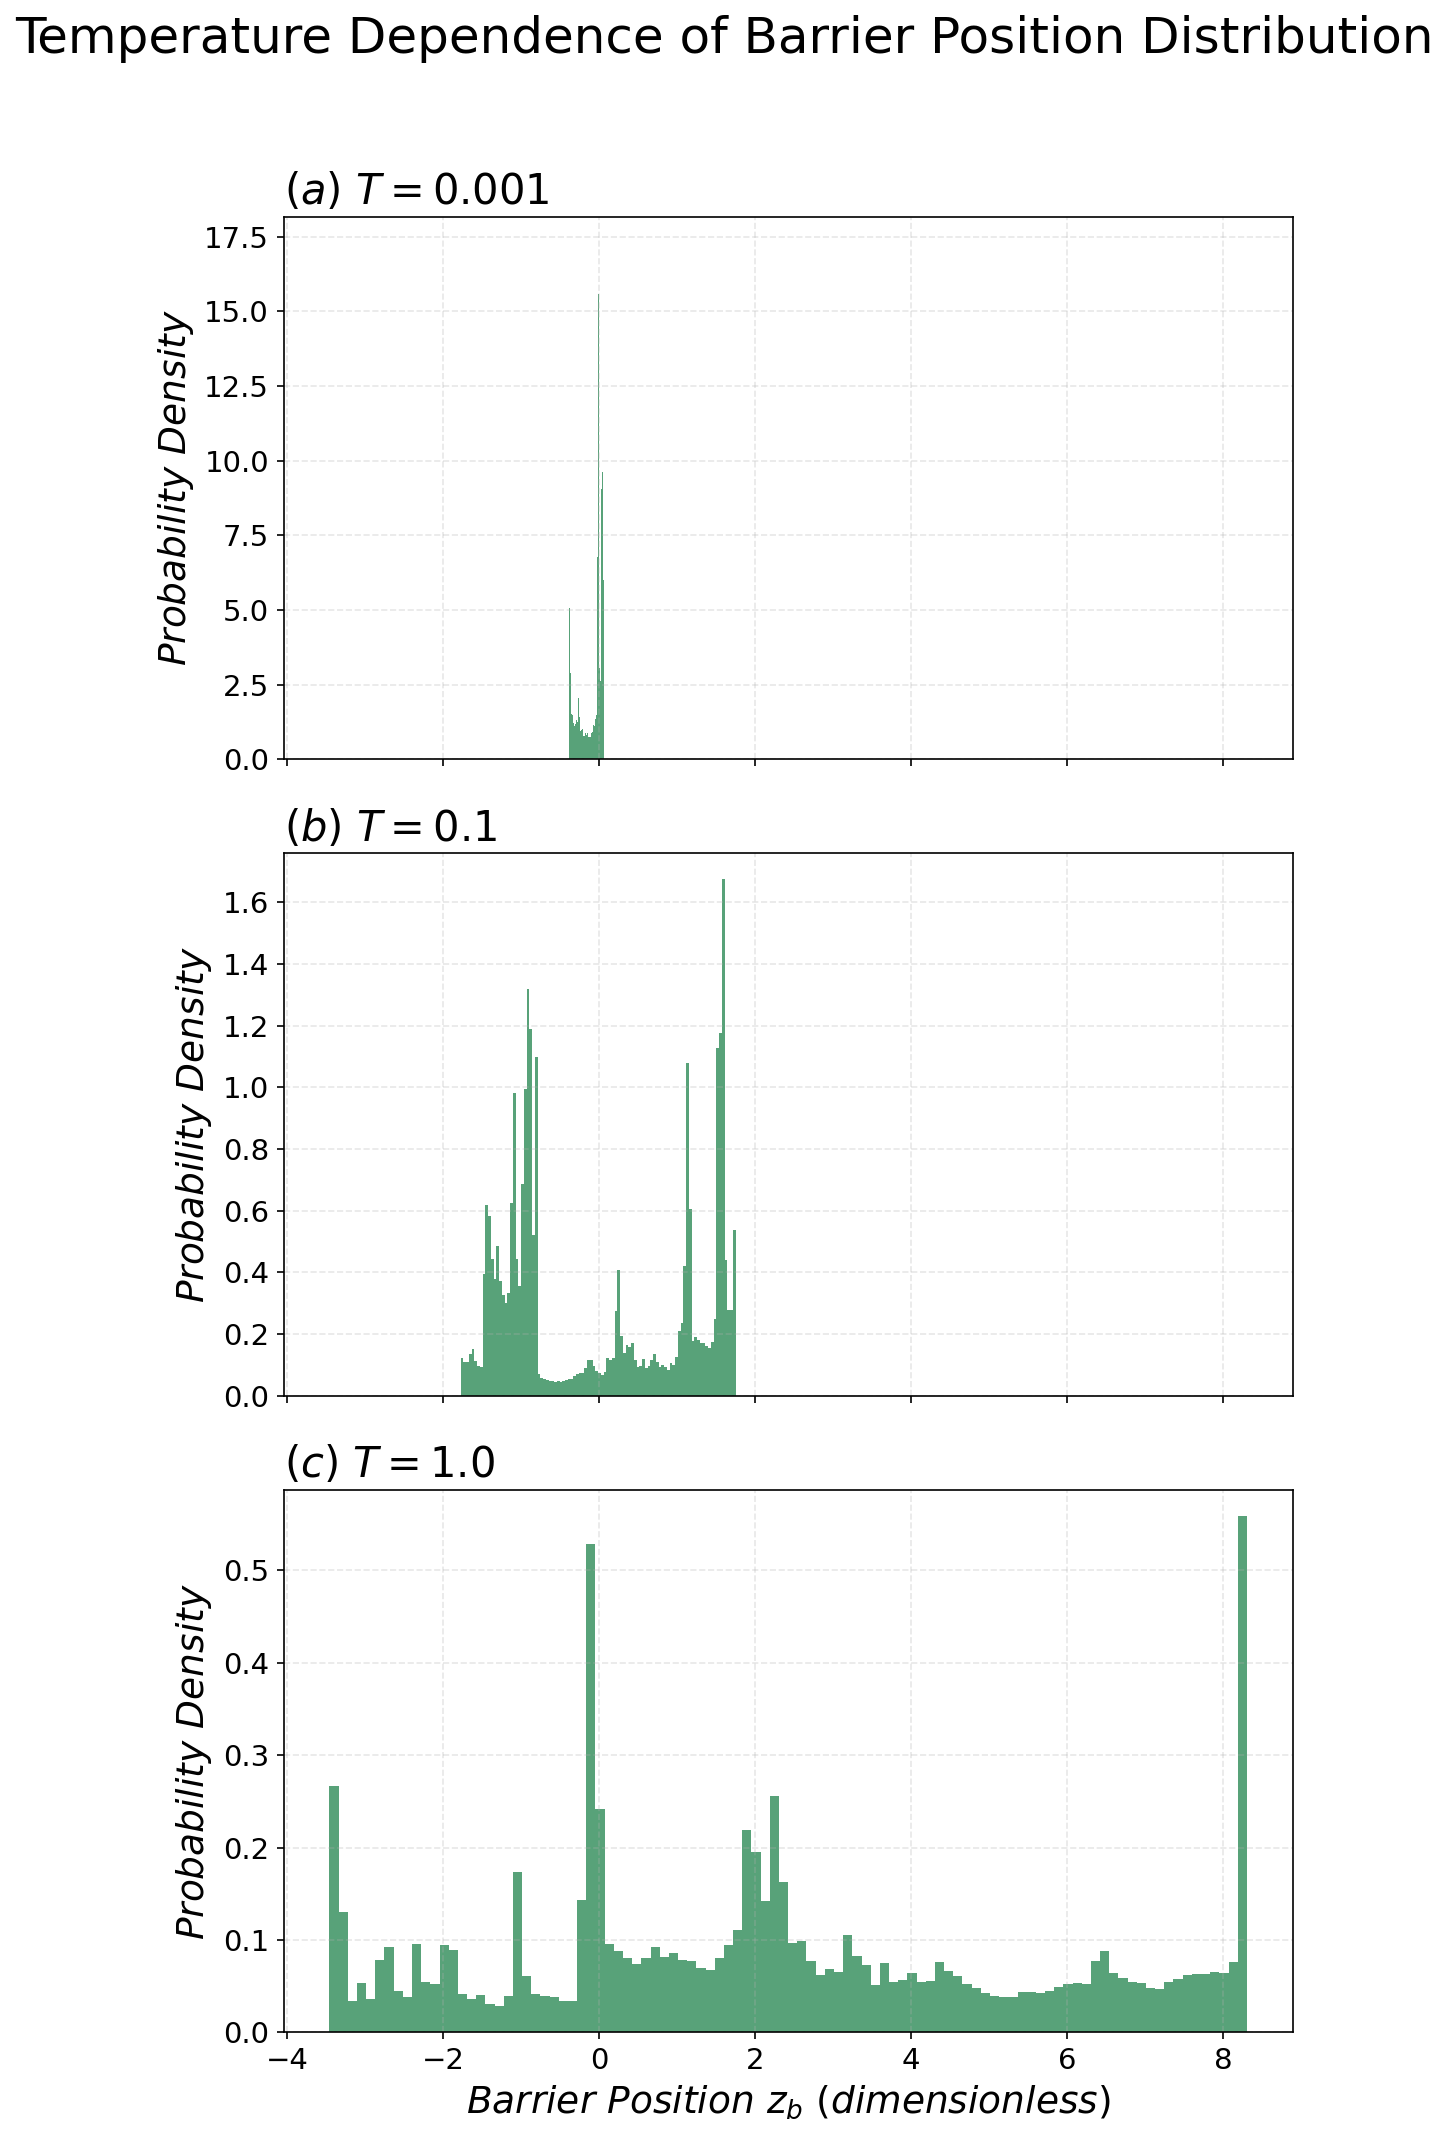


【成果物の保存に関するご確認】

1. Google Colabノートブック（.ipynbファイル）について:
   - 対象ファイル: M6_02_Generate_Fig2_Bistability_v1.ipynb
   - 指示: このノートブックを、以下のフォルダに「新規保存」してください。
   - 保存先フォルダ: CoupledFieldD3D_Research_V7_20250828/01_src/analysis/

2. 生成されたビジュアル画像データ（.pdfファイル）について:
   - 対象ファイル: Fig2_Bistability_Histograms.pdf
   - 指示: Colabからこのファイルをダウンロードし、Overleafのプロジェクトにアップロードしてください。
   - 最終的な保存先フォルダ: CoupledFieldD3D_Research_V7_20250828/05_paper_v7_publication/figures/


In [2]:
# =============================================================================
# M6_02_Generate_Fig2_Bistability_v1.ipynb
#
# 目的:
# M4で得られた3つの温度条件における3Dクローズドループの時系列データ(CSV)を読み込み、
# 論文の図2となる、確率密度分布（ヒストグラム）の比較図を、
# 論文掲載品質のPDFファイルとして生成・保存する。
# =============================================================================

# === セル 1: ライブラリのインポート ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("ライブラリのインポートが完了しました。")

# --- 2. 論文掲載用のプロットスタイルガイドを定義 ---
plot_style_en = {
    'font.family': 'sans-serif', 'font.sans-serif': ['Helvetica', 'Arial', 'DejaVu Sans'],
    'font.size': 14, 'axes.labelsize': 18, 'axes.titlesize': 20,
    'xtick.labelsize': 14, 'ytick.labelsize': 14, 'legend.fontsize': 14,
    'figure.figsize': (8, 12), 'figure.dpi': 150,
    'axes.grid': True, 'grid.alpha': 0.3, 'grid.linestyle': '--',
    'pdf.fonttype': 42, 'ps.fonttype': 42
}
plt.rcParams.update(plot_style_en)
print("\n論文掲載用のプロットスタイルが適用されました。")


# --- 3. データのアップロードと読み込みの準備 ---
# 【先生へのお願い】
# Google Colabの左側にあるフォルダアイコンから、以下の3つのCSVファイルをアップロードしてください:
# - 3d_cl_T0.001_Pout_raw.csv
# - 3d_cl_T0.1_Pout_raw.csv
# - 3d_cl_T1.0_Pout_raw.csv

temperatures_to_plot = [0.001, 0.1, 1.0]
data_files = {
    0.001: '3d_cl_T0.001_Pout_raw.csv',
    0.1: '3d_cl_T0.1_Pout_raw.csv',
    1.0: '3d_cl_T1.0_Pout_raw.csv'
}
dataframes = {}
all_files_found = True

for temp, filename in data_files.items():
    try:
        dataframes[temp] = pd.read_csv(filename)
        print(f" - ファイル '{filename}' の読み込みに成功。")
    except FileNotFoundError:
        print(f" - エラー: ファイル '{filename}' が見つかりません。アップロードを確認してください。")
        all_files_found = False

# --- 4. 比較図の生成とPDF保存 ---
if all_files_found:
    # 3つのパネルを縦に並べた図を作成
    fig, axes = plt.subplots(3, 1, figsize=(8, 15), sharex=True)
    fig.suptitle('Temperature Dependence of Barrier Position Distribution', fontsize=24, y=0.95)

    panel_labels = ['(a)', '(b)', '(c)']

    for i, temp in enumerate(temperatures_to_plot):
        ax = axes[i]
        df = dataframes[temp]
        zb_data = df['zb_position']

        # ヒストグラムをプロット
        ax.hist(zb_data, bins=100, density=True, color='seagreen', alpha=0.8)

        # ラベルとタイトル
        ax.set_ylabel(r'$Probability\ Density$')
        ax.set_title(f'${panel_labels[i]}\ T = {temp}$', loc='left')

        # y軸の範囲を調整して見やすくする
        ax.set_ylim(bottom=0)

    # 一番下のパネルにのみx軸ラベルを表示
    axes[-1].set_xlabel(r'$Barrier\ Position\ z_b\ (dimensionless)$')

    plt.tight_layout(rect=[0, 0, 1, 0.93]) # suptitleとの重なりを調整

    # PDFファイルとして保存
    pdf_filename = "Fig2_Bistability_Histograms.pdf"
    plt.savefig(pdf_filename, bbox_inches='tight')
    print(f"\n最終プロットを '{pdf_filename}' として保存しました。")

    plt.show()

    # --- 5. 保存手順の最終確認明示 ---
    print("\n" + "="*60)
    print("【成果物の保存に関するご確認】")
    print("\n1. Google Colabノートブック（.ipynbファイル）について:")
    print(f"   - 対象ファイル: M6_02_Generate_Fig2_Bistability_v1.ipynb")
    print(f"   - 指示: このノートブックを、以下のフォルダに「新規保存」してください。")
    print(f"   - 保存先フォルダ: CoupledFieldD3D_Research_V7_20250828/01_src/analysis/")
    print("\n2. 生成されたビジュアル画像データ（.pdfファイル）について:")
    print(f"   - 対象ファイル: {pdf_filename}")
    print(f"   - 指示: Colabからこのファイルをダウンロードし、Overleafのプロジェクトにアップロードしてください。")
    print(f"   - 最終的な保存先フォルダ: CoupledFieldD3D_Research_V7_20250828/05_paper_v7_publication/figures/")
    print("="*60)

else:
    print("\n必要なCSVファイルが見つからなかったため、プロットを生成できませんでした。")